#Analyzing Data

##Prison Helicopter Escapes
We begin by importing some helper functions.

##helper.py

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

def data_from_url(url):
    df = pd.read_html(url)[1]
    lol = df.to_numpy().tolist()
    return lol

def fetch_year(date_string):
    return int(re.findall("\d{4}", date_string)[0])

def barplot(list_of_2_element_list):
    d = {ya[0]:ya[1] for ya in list_of_2_element_list}
    plt.figure(figsize=(9,15))
    axes = plt.axes()
    axes.get_xaxis().set_visible(False)

    spines = axes.spines
    spines['top'].set_visible(False)
    spines['right'].set_visible(False)
    spines['bottom'].set_visible(False)
    spines['left'].set_visible(False)
    ax = plt.barh(*zip(*d.items()), height=.5)
    plt.yticks(list(d.keys()), list(d.keys()))
    plt.xticks(range(4), range(4))
    rectangles = ax.patches
    for rectangle in rectangles:
        x_value = rectangle.get_width()
        y_value = rectangle.get_y() + rectangle.get_height() / 2
        space = 5
        ha = 'left'
        label = "{}".format(x_value)
        if x_value > 0:
            plt.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords="offset points",
                va='center',
                ha=ha)

    axes.tick_params(tick1On=False)
    plt.show()

def unique_countries(countries):
    s = pd.Series(countries)
    return list(s.unique())

def display_no_index(df):
    display(HTML(df.to_html(index=False)))

def print_pretty_table(countries_frequency):
    countries = df.Country.value_counts().index
    occurrences = df.Country.value_counts().values
    d = {"Country": countries, "Number of Occurrences": occurrences}
    display_no_index(pd.DataFrame(d))

df = pd.read_html("https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes")[1]
df = df[["Date", "Prison name", "Country", "Succeeded", "Escapee(s)"]]

In [7]:
from helper import *

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [8]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data = data_from_url(url)

In [9]:
#Let's print the first row
data[0]

['August 19, 1971',
 'Santa Martha Acatitla',
 'Mexico',
 'Yes',
 'Joel David Kaplan Carlos Antonio Contreras Castro',
 "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspi

In [10]:
#Let's get details column out of the syllabus
index = 0
for row in data:
  data[index] = row[:-1] #deducting the last column by row calling
  index += 1
print(data)

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson'], ['February 27, 1981', 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard Dupré Daniel Beaumont'], ['May 7, 1981', 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker) Giles Arseneault (prisoner)'], ['January, 1983', 'Pentridge (HM Prison)', 'Australia', 'No', 'David McMillan'], ['December 19, 1985', 'Perry Correctional Institution, Pelzer, South Carolina', 'United States', 'Yes', 'James Rodney Leonard William Douglas Ballew Jesse Glenn Smith'], ['December 31, 1985', 'Cândido Mendes penitentiary, Ilha Grande, Rio de Janeiro', 'Brazil', 'Yes', 'José Carlos dos Reis Encina, a.k.a. "Escadinha"

In [11]:
#fetch the year portion from the dataset
for row in data:
    row[0] = fetch_year(row[0])
print(data[:5])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson'], [1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard Dupré Daniel Beaumont'], [1981, 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker) Giles Arseneault (prisoner)']]


In [12]:
from datetime import datetime
today = datetime.now()
d = today.year
print(d)

2023


In [13]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

years = []
for year in range(min_year, max_year + 1):
    years.append(year)

#Create a list, attempts_per_year, whose elements all look like [<year>, 0].
attempts_per_year = []
for year in years:
  attempts_per_year.append([year, 0])
print(attempts_per_year)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


In [14]:
# Instruction 1 - for each row in data
for row in data:
    for year_attempt in attempts_per_year:
      # Instruction 3 - assign the year value in year_attempt to year
        year = year_attempt[0]
        if row[0] == year:
            year_attempt[1] += 1
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


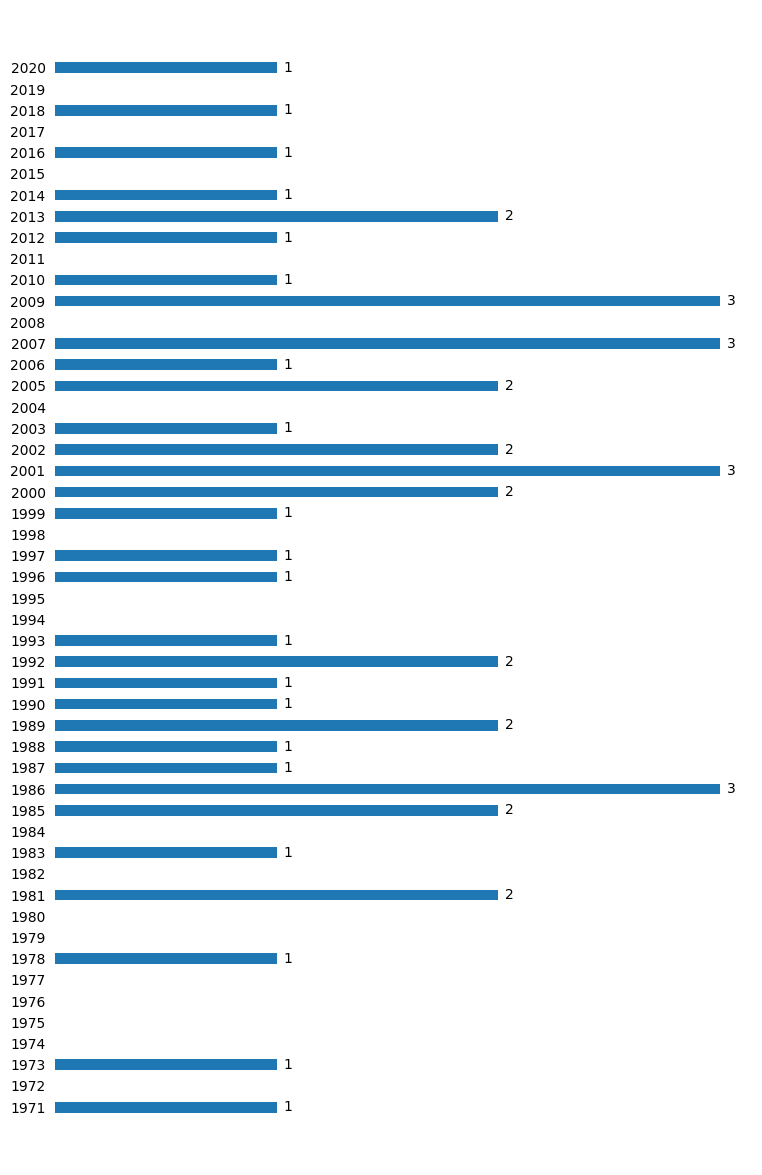

In [15]:
%matplotlib inline
barplot(attempts_per_year)

In [16]:
countries_frequency = df["Country"].value_counts()
print_pretty_table(countries_frequency)
countries_frequency.describe(include='all')

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Mexico,1
Ireland,1


count    15.000000
mean      3.200000
std       3.802255
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      15.000000
Name: Country, dtype: float64

It can be concluded that in years `2009,2007,2001 and 1986`, higher number of attempts were recorded. However, France has highest of attempts of prison break.



***In which countries do helicopter prison breaks have a higher chance of success?***

In [17]:
country_name_successful_attempt = []
for row in data:
    c = row[2:4]
    country_name_successful_attempt.append(c)
print(country_name_successful_attempt)

# in this coding we will get repeated values which can not be plotted easily
# thus one has to make sure to make a list with array like [variable, 0] then appends it

[['Mexico', 'Yes'], ['Ireland', 'Yes'], ['United States', 'No'], ['France', 'Yes'], ['Canada', 'No'], ['Australia', 'No'], ['United States', 'Yes'], ['Brazil', 'Yes'], ['France', 'Yes'], ['United States', 'Yes'], ['Italy', 'Yes'], ['United Kingdom', 'Yes'], ['United States', 'Yes'], ['United States', 'No'], ['United States', 'Yes'], ['Canada', 'Yes'], ['Puerto Rico', 'Yes'], ['France', 'Yes'], ['France', 'No'], ['France', 'No'], ['Chile', 'Yes'], ['Netherlands', 'No'], ['Australia', 'Yes'], ['United States', 'Yes'], ['France', 'Yes'], ['France', 'Yes'], ['France', 'Yes'], ['France', 'No'], ['Brazil', 'Yes'], ['United States', 'Yes'], ['France', 'Yes'], ['France', 'No'], ['France', 'Yes'], ['Greece', 'Yes'], ['Belgium', 'Yes'], ['France', 'Yes'], ['Belgium', 'No'], ['Greece', 'Yes'], ['France', 'Yes'], ['Belgium', 'Yes'], ['United Kingdom', 'No'], ['Russia', 'Yes'], ['Greece', 'No'], ['Canada', 'Yes'], ['Canada', 'Yes'], ['Greece', 'No'], ['France', 'Yes'], ['Belgium', 'No']]


In [18]:
for row in country_name_successful_attempt:
    if row[1] == "Yes":
        row[1] = 1
    else:
        row[1] = 0
print(country_name_successful_attempt)

#problems are shown as united states name repeated
# we will make another variable to clear the area

[['Mexico', 1], ['Ireland', 1], ['United States', 0], ['France', 1], ['Canada', 0], ['Australia', 0], ['United States', 1], ['Brazil', 1], ['France', 1], ['United States', 1], ['Italy', 1], ['United Kingdom', 1], ['United States', 1], ['United States', 0], ['United States', 1], ['Canada', 1], ['Puerto Rico', 1], ['France', 1], ['France', 0], ['France', 0], ['Chile', 1], ['Netherlands', 0], ['Australia', 1], ['United States', 1], ['France', 1], ['France', 1], ['France', 1], ['France', 0], ['Brazil', 1], ['United States', 1], ['France', 1], ['France', 0], ['France', 1], ['Greece', 1], ['Belgium', 1], ['France', 1], ['Belgium', 0], ['Greece', 1], ['France', 1], ['Belgium', 1], ['United Kingdom', 0], ['Russia', 1], ['Greece', 0], ['Canada', 1], ['Canada', 1], ['Greece', 0], ['France', 1], ['Belgium', 0]]


In [19]:
country_name = []
for row in data:
    c = row[2]
    country_name.append([c,0])
print(country_name)

[['Mexico', 0], ['Ireland', 0], ['United States', 0], ['France', 0], ['Canada', 0], ['Australia', 0], ['United States', 0], ['Brazil', 0], ['France', 0], ['United States', 0], ['Italy', 0], ['United Kingdom', 0], ['United States', 0], ['United States', 0], ['United States', 0], ['Canada', 0], ['Puerto Rico', 0], ['France', 0], ['France', 0], ['France', 0], ['Chile', 0], ['Netherlands', 0], ['Australia', 0], ['United States', 0], ['France', 0], ['France', 0], ['France', 0], ['France', 0], ['Brazil', 0], ['United States', 0], ['France', 0], ['France', 0], ['France', 0], ['Greece', 0], ['Belgium', 0], ['France', 0], ['Belgium', 0], ['Greece', 0], ['France', 0], ['Belgium', 0], ['United Kingdom', 0], ['Russia', 0], ['Greece', 0], ['Canada', 0], ['Canada', 0], ['Greece', 0], ['France', 0], ['Belgium', 0]]


In [20]:
#Successful Attempts by Country
for row in data:
  for name in country_name:
    n = name[0]
    if row[2] == n and row[3] == "Yes":
      name[1] += 1
    else:
      0
print(country_name)

[['Mexico', 1], ['Ireland', 1], ['United States', 6], ['France', 11], ['Canada', 3], ['Australia', 1], ['United States', 6], ['Brazil', 2], ['France', 11], ['United States', 6], ['Italy', 1], ['United Kingdom', 1], ['United States', 6], ['United States', 6], ['United States', 6], ['Canada', 3], ['Puerto Rico', 1], ['France', 11], ['France', 11], ['France', 11], ['Chile', 1], ['Netherlands', 0], ['Australia', 1], ['United States', 6], ['France', 11], ['France', 11], ['France', 11], ['France', 11], ['Brazil', 2], ['United States', 6], ['France', 11], ['France', 11], ['France', 11], ['Greece', 2], ['Belgium', 2], ['France', 11], ['Belgium', 2], ['Greece', 2], ['France', 11], ['Belgium', 2], ['United Kingdom', 1], ['Russia', 1], ['Greece', 2], ['Canada', 3], ['Canada', 3], ['Greece', 2], ['France', 11], ['Belgium', 2]]


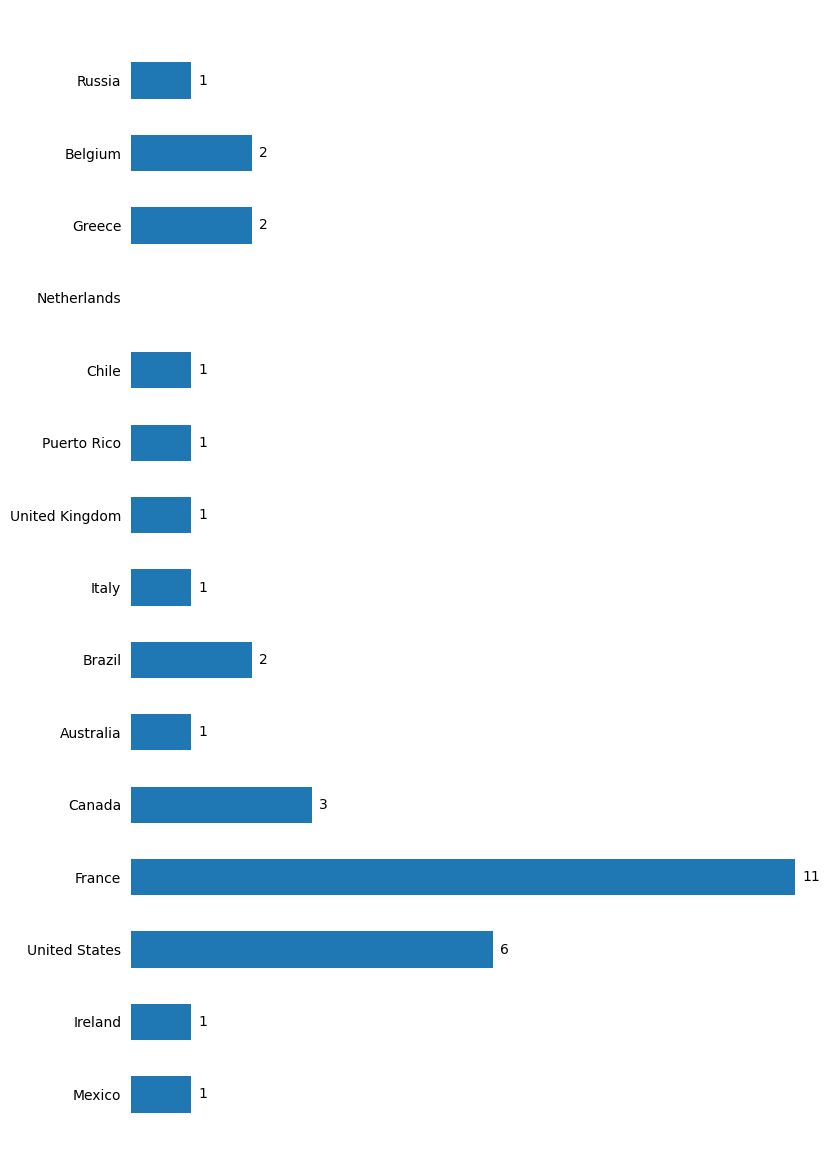

In [21]:
%matplotlib inline
barplot(country_name)
#Successful attempts by Country

From the plot above it can be seen that France saw the most successful attempts of Helicopter prison escapes with the number of 11.

***Which escapees have done it more than once?***

In [23]:
#First of all print the dataset
print(data)

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson'], [1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard Dupré Daniel Beaumont'], [1981, 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker) Giles Arseneault (prisoner)'], [1983, 'Pentridge (HM Prison)', 'Australia', 'No', 'David McMillan'], [1985, 'Perry Correctional Institution, Pelzer, South Carolina', 'United States', 'Yes', 'James Rodney Leonard William Douglas Ballew Jesse Glenn Smith'], [1985, 'Cândido Mendes penitentiary, Ilha Grande, Rio de Janeiro', 'Brazil', 'Yes', 'José Carlos dos Reis Encina, a.k.a. "Escadinha"'], [1986, 'Prison de la Santé', 'France', 'Yes', 'Michel Vaujour'], [1986, 'Federal Correctional Inst

In [24]:
coun = []
for row in data:
    f = row[2]
    coun.append([f,0])
print(coun)

[['Mexico', 0], ['Ireland', 0], ['United States', 0], ['France', 0], ['Canada', 0], ['Australia', 0], ['United States', 0], ['Brazil', 0], ['France', 0], ['United States', 0], ['Italy', 0], ['United Kingdom', 0], ['United States', 0], ['United States', 0], ['United States', 0], ['Canada', 0], ['Puerto Rico', 0], ['France', 0], ['France', 0], ['France', 0], ['Chile', 0], ['Netherlands', 0], ['Australia', 0], ['United States', 0], ['France', 0], ['France', 0], ['France', 0], ['France', 0], ['Brazil', 0], ['United States', 0], ['France', 0], ['France', 0], ['France', 0], ['Greece', 0], ['Belgium', 0], ['France', 0], ['Belgium', 0], ['Greece', 0], ['France', 0], ['Belgium', 0], ['United Kingdom', 0], ['Russia', 0], ['Greece', 0], ['Canada', 0], ['Canada', 0], ['Greece', 0], ['France', 0], ['Belgium', 0]]


In [25]:
#Total Attempts by country
for row in data:
  for x in coun:
    y = x[0]
    if row[2] == y:
      x[1] += 1
print(coun)

[['Mexico', 1], ['Ireland', 1], ['United States', 8], ['France', 15], ['Canada', 4], ['Australia', 2], ['United States', 8], ['Brazil', 2], ['France', 15], ['United States', 8], ['Italy', 1], ['United Kingdom', 2], ['United States', 8], ['United States', 8], ['United States', 8], ['Canada', 4], ['Puerto Rico', 1], ['France', 15], ['France', 15], ['France', 15], ['Chile', 1], ['Netherlands', 1], ['Australia', 2], ['United States', 8], ['France', 15], ['France', 15], ['France', 15], ['France', 15], ['Brazil', 2], ['United States', 8], ['France', 15], ['France', 15], ['France', 15], ['Greece', 4], ['Belgium', 4], ['France', 15], ['Belgium', 4], ['Greece', 4], ['France', 15], ['Belgium', 4], ['United Kingdom', 2], ['Russia', 1], ['Greece', 4], ['Canada', 4], ['Canada', 4], ['Greece', 4], ['France', 15], ['Belgium', 4]]


In [26]:
#Successful attempts by country
print(country_name)

[['Mexico', 1], ['Ireland', 1], ['United States', 6], ['France', 11], ['Canada', 3], ['Australia', 1], ['United States', 6], ['Brazil', 2], ['France', 11], ['United States', 6], ['Italy', 1], ['United Kingdom', 1], ['United States', 6], ['United States', 6], ['United States', 6], ['Canada', 3], ['Puerto Rico', 1], ['France', 11], ['France', 11], ['France', 11], ['Chile', 1], ['Netherlands', 0], ['Australia', 1], ['United States', 6], ['France', 11], ['France', 11], ['France', 11], ['France', 11], ['Brazil', 2], ['United States', 6], ['France', 11], ['France', 11], ['France', 11], ['Greece', 2], ['Belgium', 2], ['France', 11], ['Belgium', 2], ['Greece', 2], ['France', 11], ['Belgium', 2], ['United Kingdom', 1], ['Russia', 1], ['Greece', 2], ['Canada', 3], ['Canada', 3], ['Greece', 2], ['France', 11], ['Belgium', 2]]


In [27]:
new = []
for row in coun:
  if row[1] > 1:
    new.append([row[0], row[1]])
print(new)

[['United States', 8], ['France', 15], ['Canada', 4], ['Australia', 2], ['United States', 8], ['Brazil', 2], ['France', 15], ['United States', 8], ['United Kingdom', 2], ['United States', 8], ['United States', 8], ['United States', 8], ['Canada', 4], ['France', 15], ['France', 15], ['France', 15], ['Australia', 2], ['United States', 8], ['France', 15], ['France', 15], ['France', 15], ['France', 15], ['Brazil', 2], ['United States', 8], ['France', 15], ['France', 15], ['France', 15], ['Greece', 4], ['Belgium', 4], ['France', 15], ['Belgium', 4], ['Greece', 4], ['France', 15], ['Belgium', 4], ['United Kingdom', 2], ['Greece', 4], ['Canada', 4], ['Canada', 4], ['Greece', 4], ['France', 15], ['Belgium', 4]]


In [28]:
success_rate = []
for row in new:
  for b in country_name:
    if row[0] == b[0]:
      rate = b[1]/row[1]
      success_rate.append([row[0], rate])
print(success_rate)

[['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['France', 0.7333333333333333], ['Canada', 0.75], ['Canada', 0.75], ['Canada', 0.75], ['Canada', 0.75], ['Australia', 0.5], ['Australia', 0.5], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['United States', 0.75], ['Brazi

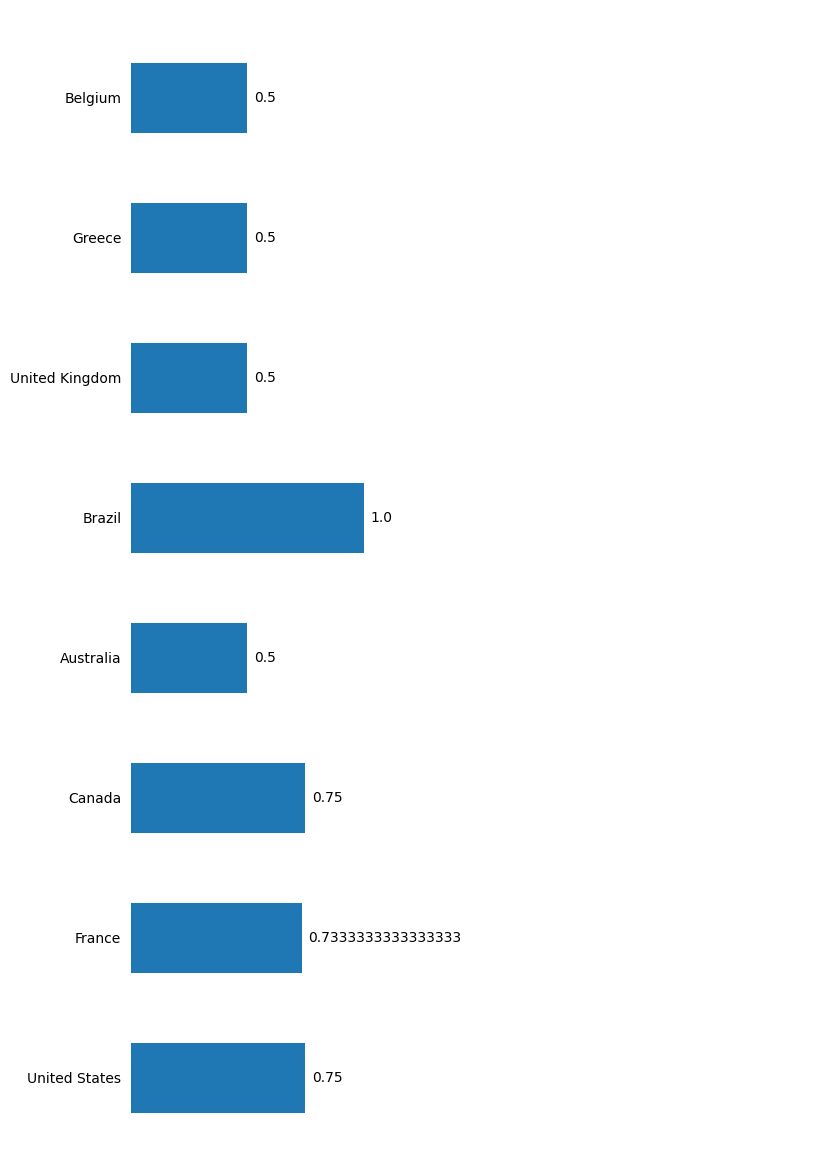

In [29]:
%matplotlib inline
barplot(success_rate)
#Success rates by Country